# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

*Add your answer here*

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

*Add your text answer here*

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

*Add your text answer here*

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:
![image.png](attachment:image.png)

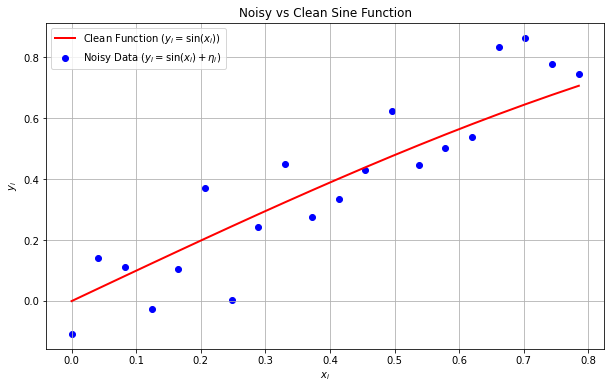

In [30]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

def generate_sin(x, epsilon):
    sin_xi = np.sin(x)
    eta_i = np.random.normal(0, epsilon, len(x))
    yi = sin_xi + eta_i
    return yi

n_samples = 20

# TODO: create noisy function
x = np.linspace(0, np.pi/4, n_samples)
y = generate_sin(x, epsilon=0.1)

# TODO: create true function
x_pure = x
y_pure = np.sin(x_pure)

# TODO: plot data, line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Noisy Data ($y_i = \sin(x_i) + \eta_i$)')
plt.plot(x_pure, y_pure, color='red', label='Clean Function ($y_i = \sin(x_i)$)', linewidth=2)
plt.title('Noisy vs Clean Sine Function')
plt.xlabel('$x_i$')
plt.ylabel('$y_i$')
plt.legend()
plt.grid(True)
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

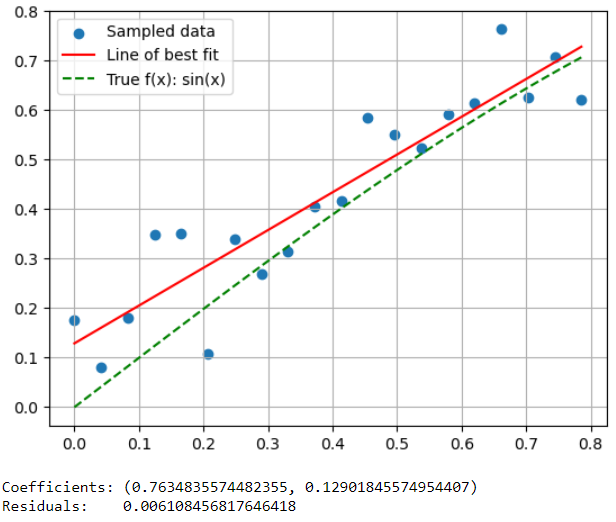

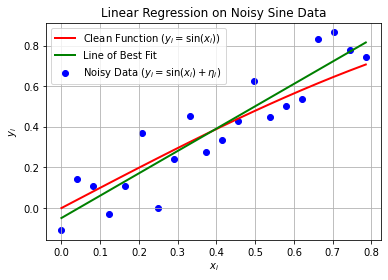

Coefficients: (-0.04893769866404257, 1.1008015561090474)
Residuals:    0.2514649596782553


In [31]:
def compute_sos(y_true, y_pred):
    sos = np.sum((y_true - y_pred) ** 2)
    return sos

def lin_reg(xs, ys):
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)
    b = np.sum((xs - x_mean) * (ys - y_mean)) / np.sum((xs - x_mean) ** 2)
    a = y_mean - b * x_mean
    
    y_pred = a + b * xs
    res = compute_sos(ys, y_pred)
    return a, b, res

# TODO: generate line of best fit
a, b, res = lin_reg(x, y)
y_best = b*x+a


# TODO: plot line of best fit, data, etc
plt.scatter(x, y, color='blue', label='Noisy Data ($y_i = \sin(x_i) + \eta_i$)')
plt.plot(x_pure, y_pure, color='red', label='Clean Function ($y_i = \sin(x_i)$)', linewidth=2)
plt.plot(x, y_best, color='green', label='Line of Best Fit', linewidth=2)

# make it pretty
plt.grid()
plt.legend()
plt.title('Linear Regression on Noisy Sine Data')
plt.xlabel('$x_i$')
plt.ylabel('$y_i$')
plt.show()

print("Coefficients:", (a, b))
print("Residuals:   ", res)

## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

Coefficients:      (-0.04893769866404257, 1.1008015561090474)
Residuals:         0.2514649596782553
Coefficients (np): (-0.048937698664042635, 1.1008015561090476)
Residuals (np):    0.2514649596782553


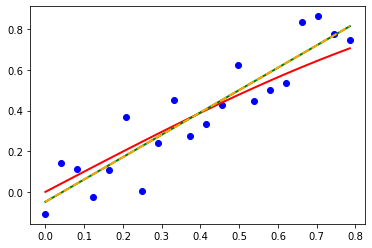

In [32]:
# TODO: use np polyfit here
b_np, a_np = np.polyfit(x, y, 1)
y_best_np = b_np*x+a_np
res_np = compute_sos(y, y_best_np)

# TODO: plot everything you need to
plt.scatter(x, y, color='blue', label='Noisy Data ($y_i = \sin(x_i) + \eta_i$)')
plt.plot(x_pure, y_pure, color='red', label='Clean Function ($y_i = \sin(x_i)$)', linewidth=2)
plt.plot(x, y_best, color='green', label='Line of Best Fit', linewidth=2)
plt.plot(x, y_best_np, color='orange', label='Line of Best Fit (np)', linewidth=2, linestyle='--')


# print results
print("Coefficients:     ", (a, b))
print("Residuals:        ", res)
print("Coefficients (np):", (a_np, b_np))
print("Residuals (np):   ", res_np)

The results show that underlying a polyfit implementation (of degree 1, linear) is the same logic as the closed-form implementation from the previous questions. The polyfit function is solving the same system of equations, using a different method.

The polyfit function returns the same coefficients and residuals as the closed-form solution. This shows that the polyfit function is implemented using the same logic as the closed-form solution.

The values for `a` and `b` are the same as the ones obtained from the closed-form solution. The residuals are also the same.


## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

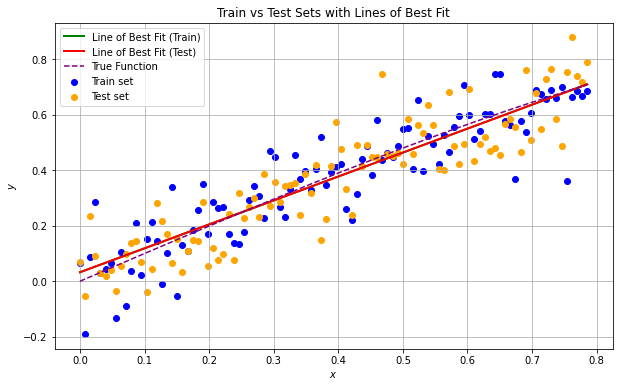

Coefficients:  (0.032343217467179185, 0.8618070068535078)
Train loss:    0.009589590856516492
Test loss:     0.009431172629329476


In [37]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sin(x, epsilon):
    sin_xi = np.sin(x)
    eta_i = np.random.normal(0, epsilon, len(x))
    yi = sin_xi + eta_i
    return yi

def compute_mse(y_true, y_pred):
    """
    Compute the Mean Squared Error (MSE) between true and predicted y values.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

n_samples = 100
epsilon = 0.1

# Generating train set
x_train = np.linspace(0, np.pi/4, n_samples)
y_train = generate_sin(x_train, epsilon)

# Generating test set
x_test = np.linspace(0, np.pi/4, n_samples)
y_test = generate_sin(x_test, epsilon)

# Calculating coefficients a and b for the train set
coefficients = np.polyfit(x_train, y_train, 1)
b, a = coefficients

# Generating predictions for train and test sets
y_train_pred = a + b * x_train
y_test_pred = a + b * x_test

# Computing train and test losses (MSE)
train_loss = compute_mse(y_train, y_train_pred)
test_loss = compute_mse(y_test, y_test_pred)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label="Train set")
plt.scatter(x_test, y_test, color='orange', label="Test set")
plt.plot(x_train, y_train_pred, color='green', label="Line of Best Fit (Train)", linewidth=2)
plt.plot(x_test, y_test_pred, color='red', label="Line of Best Fit (Test)", linewidth=2)
plt.plot(x_train, np.sin(x_train), color='purple', label='True Function', linestyle='--')

# Make it pretty
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Train vs Test Sets with Lines of Best Fit')
plt.legend()
plt.grid(True)
plt.show()

print("Coefficients: ", (a, b))
print("Train loss:   ", train_loss)
print("Test loss:    ", test_loss)

Which of the two losses *should* be better? Which is actually better? Why?

It would be ideal if the test loss was lower, however, in reality the train loss will almost always be lower. This is because the model adjusts for some of the noise in the train data. Eventually, this would lead to overfitting.

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).



Higher values of N do not seem to affect the balance between train and test loss. Adjusting epsilon however does seem to widen the gap between the training loss and the test loss. 

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

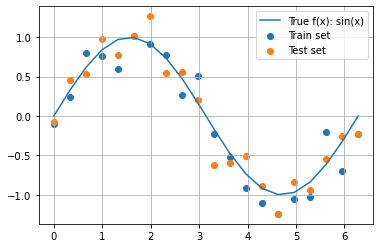

In [39]:
import numpy as np
def generate_sin(x, epsilon):
    sin_xi = np.sin(x)
    eta_i = np.random.normal(0, epsilon, len(x))
    yi = sin_xi + eta_i
    return yi

n_samples = 20
epsilon = 0.2
x_train = np.linspace(0, 2*np.pi, n_samples);
x_test = np.linspace(0, 2*np.pi, n_samples);
y_train = generate_sin(x, epsilon);
y_test = generate_sin(x, epsilon);

x_pure = x
y_pure = np.sin(x_pure)

plt.scatter(x_train, y_train, label="Train set")
plt.scatter(x_test, y_test, label="Test set")

plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
plt.grid()
plt.legend()
plt.show()

## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

In [41]:
import numpy as np

# Initialize lists to store losses and coefficients
train_losses = []
test_losses = []
coeffs = []

# Compute best fitting polynomials and losses
for d in range(1, 21):
    # Compute best fitting polynomial of degree d
    coef = np.polyfit(x_train, y_train, d)
    
    # Compute predictions
    y_pred_train = np.polyval(coef, x_train)
    y_pred_test = np.polyval(coef, x_test)
    
    # Compute losses
    train_loss = compute_mse(y_train, y_pred_train)
    test_loss = compute_mse(y_test, y_pred_test)
    
    # Store losses and coefficients
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    coeffs.append(coef)

# Print losses and coefficients
for d in range(1, 21):
    print(f"Degree: {d}")
    print(f"Train loss: {train_losses[d-1]}")
    print(f"Test loss: {test_losses[d-1]}")
    print(f"Coefficients: {coeffs[d-1]}")
    print()

Degree: 1
Train loss: 0.2751592226911631
Test loss: 0.2697684517188516
Coefficients: [-0.27420645  0.78907907]

Degree: 2
Train loss: 0.2745335328021047
Test loss: 0.2703870991301326
Coefficients: [-0.00772021 -0.22569893  0.74095563]

Degree: 3
Train loss: 0.0508244268957447
Test loss: 0.04692848781090239
Coefficients: [ 0.08804803 -0.83755331  1.80694072 -0.18468724]

Degree: 4
Train loss: 0.05077480803469223
Test loss: 0.04634885770483578
Coefficients: [-8.03062949e-04  9.81396129e-02 -8.77662761e-01  1.85975590e+00
 -1.97450204e-01]

Degree: 5
Train loss: 0.037315232931458116
Test loss: 0.0352525392959954
Coefficients: [-0.00822011  0.1283181  -0.61501844  0.74619434  0.53669434 -0.01744104]

Degree: 6
Train loss: 0.03187770054759995
Test loss: 0.03906250042953084
Coefficients: [-0.0033009   0.05400043 -0.3124077   0.82935825 -1.40684564  1.71604557
 -0.10871198]

Degree: 7
Train loss: 0.03010670026616617
Test loss: 0.040082881695988996
Coefficients: [ 1.21313864e-03 -2.99792140e-0

c:\Users\dante\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\dante\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\dante\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

This likely means that the degree of the polynomial is likely too high, which leads to a matrix that is close to being singlular, and therefore leads to instability in the model and less accurate results.

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

c:\Users\dante\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


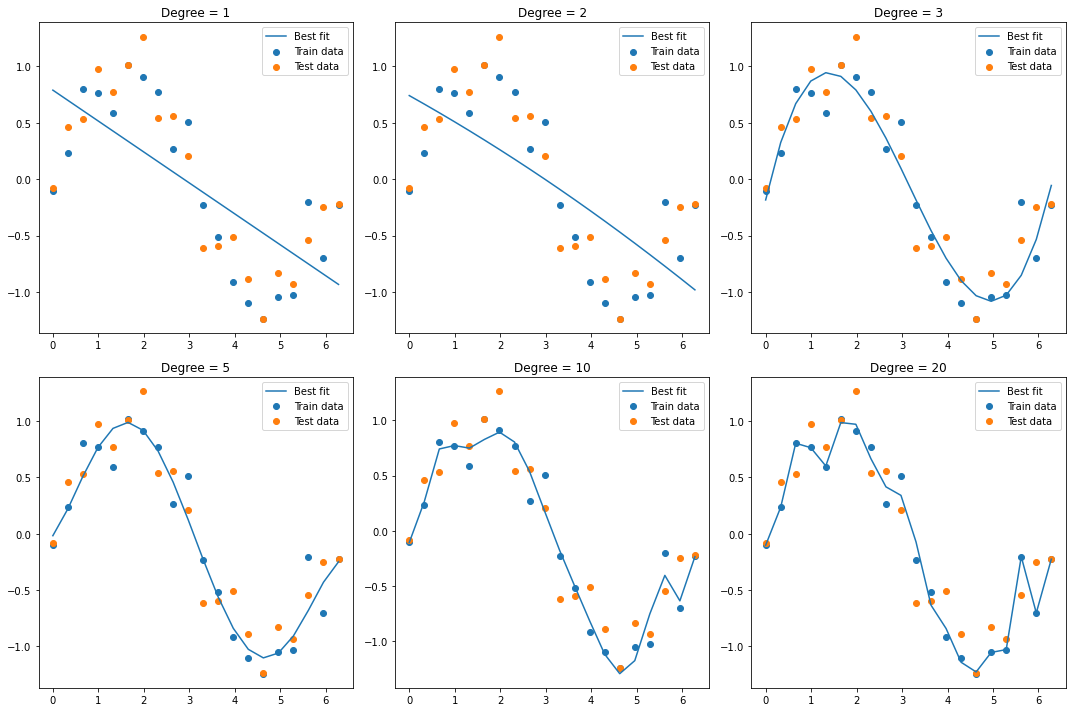

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Define the degrees
degrees = [1, 2, 3, 5, 10, 20]

# Create a new figure
plt.figure(figsize=(15, 10))

# For each degree, plot the line of best fit
for i, d in enumerate(degrees):
    # Compute best fitting polynomial of degree d
    coef = np.polyfit(x_train, y_train, d)
    
    # Compute predictions
    y_pred = np.polyval(coef, x_train)
    
    # Create a new subplot
    plt.subplot(2, 3, i+1)
    
    # Plot the data and the line of best fit
    plt.scatter(x_train, y_train, label='Train data')
    plt.scatter(x_test, y_test, label='Test data')
    plt.plot(x, y_pred, label='Best fit')
    
    # Set the title and legend
    plt.title(f"Degree = {d}")
    plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

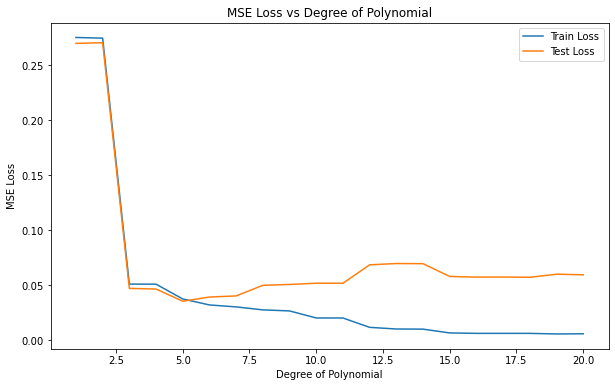

In [43]:
import matplotlib.pyplot as plt

# Define the degrees
degrees = list(range(1, 21))

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the training and test losses
plt.plot(degrees, train_losses, label='Train Loss')
plt.plot(degrees, test_losses, label='Test Loss')

# Set the title, labels, and legend
plt.title('MSE Loss vs Degree of Polynomial')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE Loss')
plt.legend()

# Show the plot
plt.show()

## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

1. The models likely start overfitting when the train and test mse start to diverge. In the case above, it would be around the 5th degree
2. Based on the outputs above, I would say that the 5th degree polynomial fits best, both visually and according to the underlying function.
3. It would likely still occur at the same point, as we have seen in the earlier questions that n-samples did not affect the train-test loss difference. Adjusting the epsilon would have that effect. 
4. No, it depends on the underlying function that generates the data points, not on the number of points. Of course, more data will likely lead to a better representation of the underlying function, which means that models can more easily approach this underlying function. 